# Importations

In [97]:
# importation des librairies python 
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import keras
from keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
#importation du dataset
data=pd.read_csv('C:\\Users\\7MAKSACOD PC\\Downloads\\bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Notre dataset comporte 11162 lignes numérotées de 0 á 11161 et 17 colonnes (dont 7 colonnes de type int64 et 10 colonnes de type Object) . Il n'y a pas de valeurs manquantes dans notre dataset .**

In [100]:
# description des données de type numériques
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


## Néttoyage

In [101]:
#copions notre datasset d'origine dans une variable nommée df
df=data.copy()

In [102]:
#suppression des colonnes months et days
df=df.drop(['day','month'],axis=1)

In [103]:
def seuil(data, colonne):
    # Calcul de q1, q3 et iqr
    q1 = data[colonne].quantile(0.25)
    q3 = data[colonne].quantile(0.75)
    iqr = q3 - q1
    
    # Les valeurs seuils 
    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5
    
    # Détection des outliers
    outliers = data[(data[colonne] < lower_bound) | (data[colonne] > upper_bound)]
    
    # Création du dictionnaire des résultats
    t = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers[colonne]
    }
    
    return t

In [104]:
# Fonction pour remplacer les outliers par la médiane
def remplacer_outliers(data, colonne):
    t = seuil(data, colonne)
    lower_bound = t['lower_bound']
    upper_bound = t['upper_bound']
    mediane = data[colonne].median()
    data[colonne] = data[colonne].apply(lambda x: mediane if x < lower_bound or x > upper_bound else x)
    return data

<Axes: >

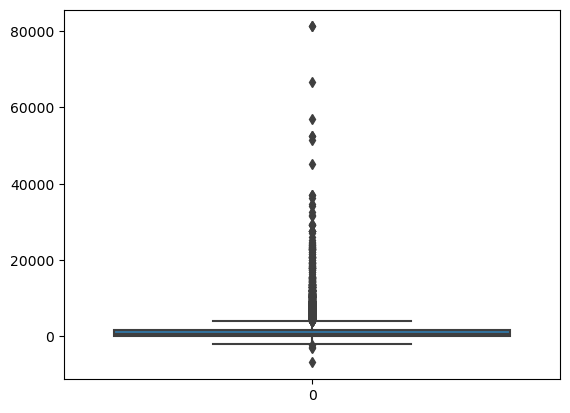

In [105]:
sns.boxplot(df['balance'])

In [106]:
#gestion des valeurs abérrantes
out_balance=seuil(df,'balance')
print('les valeurs seuils sont seuils : ',out_balance['lower_bound'] , 'et', out_balance['upper_bound'])

les valeurs seuils sont seuils :  -2257.0 et 4087.0


In [107]:
#remplacement des outliers  par la médiane
df=remplacer_outliers(data,'balance')

<Axes: >

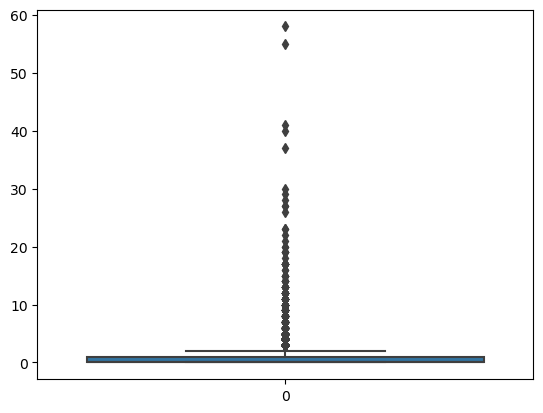

In [108]:
sns.boxplot(df['previous'])

In [109]:
#gestions des valeurs abérrantes de la colonne previous
prev=seuil(data,'previous')
print(prev['outliers'])

891       4
933       3
952       4
968       3
1007     10
         ..
11092     4
11125     3
11133     5
11145     4
11160     5
Name: previous, Length: 1258, dtype: int64


In [110]:
data=remplacer_outliers(data,'previous')

<Axes: >

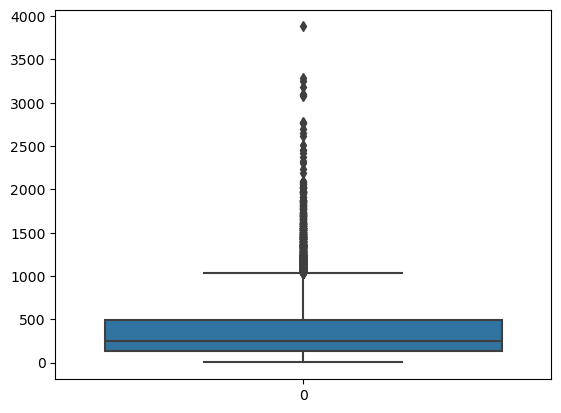

In [111]:
sns.boxplot(df['duration'])

<Axes: >

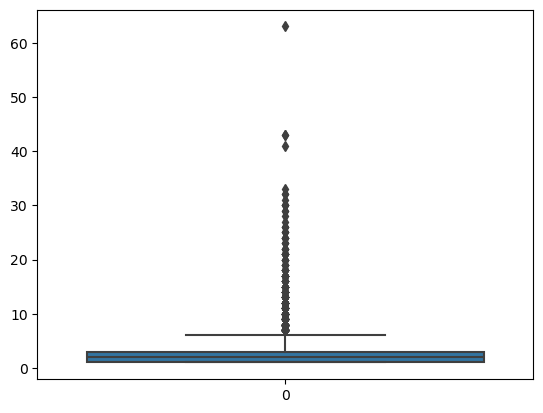

In [112]:
sns.boxplot(df['campaign'])

<Axes: >

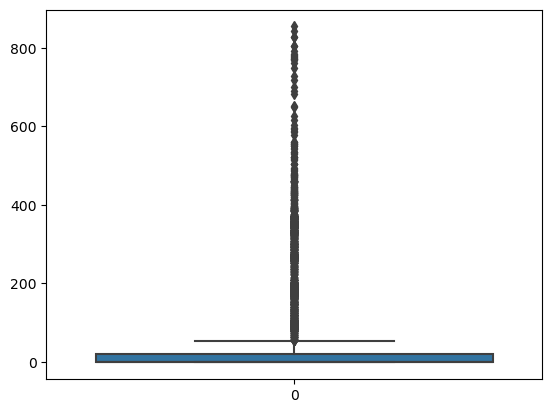

In [113]:
sns.boxplot(df['pdays'])

In [114]:
df=remplacer_outliers(df,'pdays')
df=remplacer_outliers(df,'campaign')
df=remplacer_outliers(df,'duration')

## Visualisation de la distribution des données

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


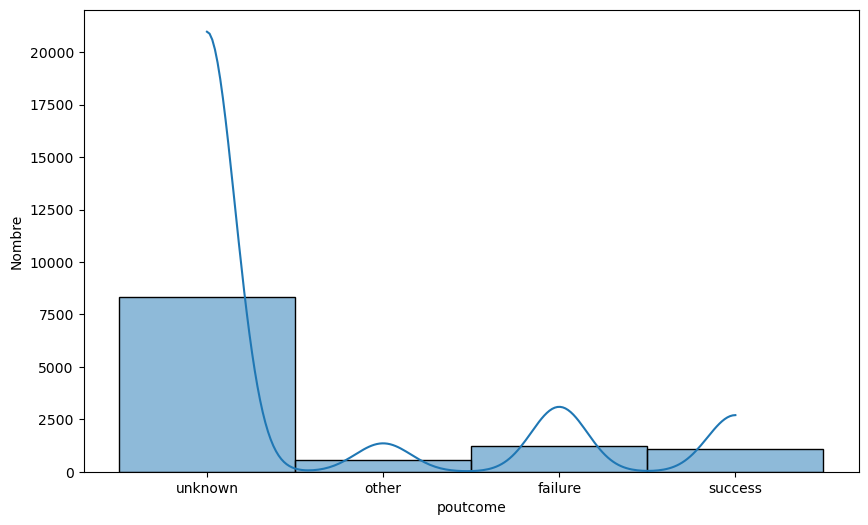

In [115]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='poutcome', multiple='stack', kde=True)
plt.xlabel("poutcome")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


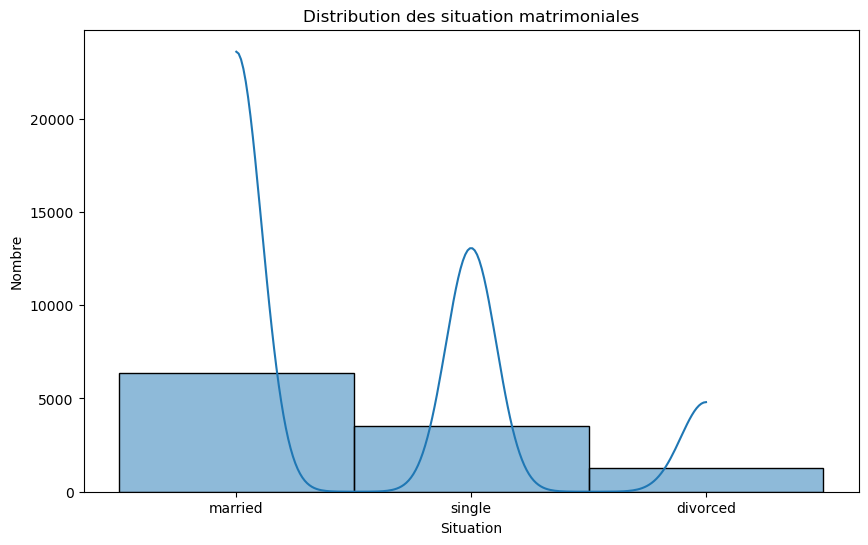

In [116]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='marital', multiple='stack', kde=True)
plt.title("Distribution des situation matrimoniales")
plt.xlabel("Situation")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


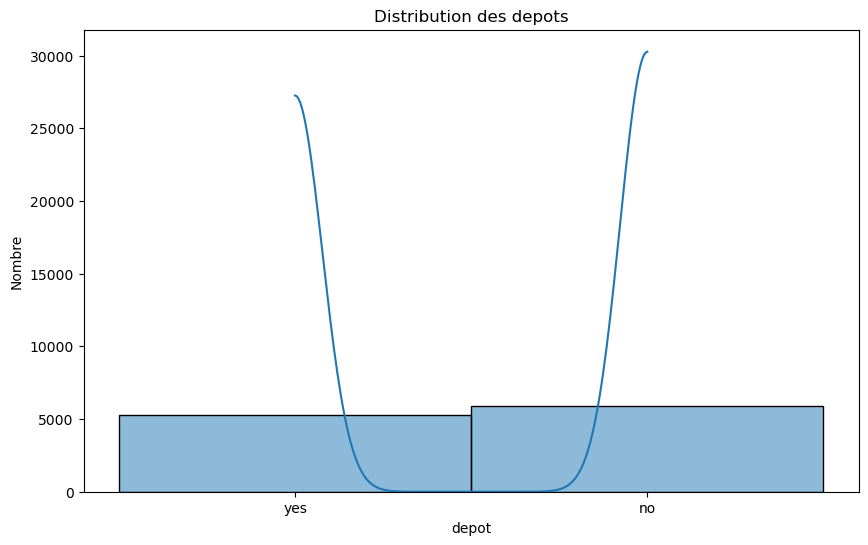

In [117]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='deposit', multiple='stack', kde=True)
plt.title("Distribution des depots")
plt.xlabel("depot")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


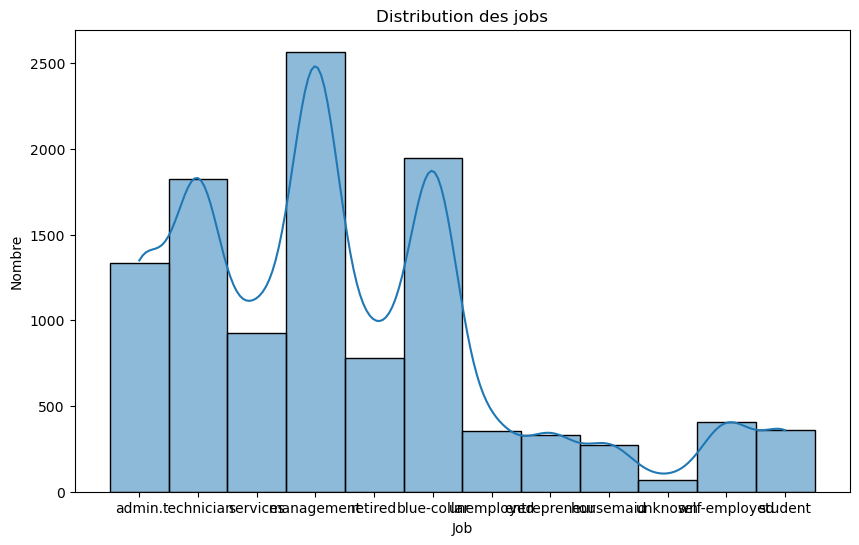

In [118]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='job', multiple='stack', kde=True)
plt.title("Distribution des jobs")
plt.xlabel("Job")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


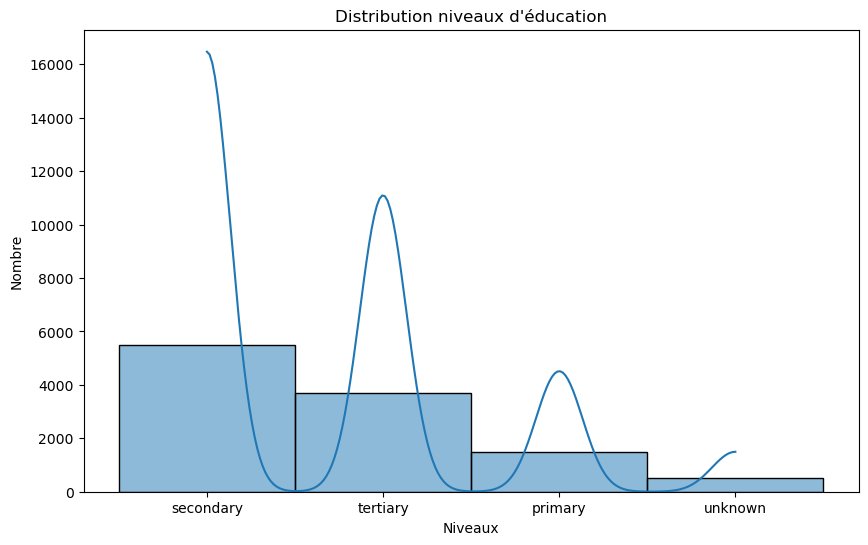

In [119]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='education', multiple='stack', kde=True)
plt.title("Distribution niveaux d'éducation")
plt.xlabel("Niveaux")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


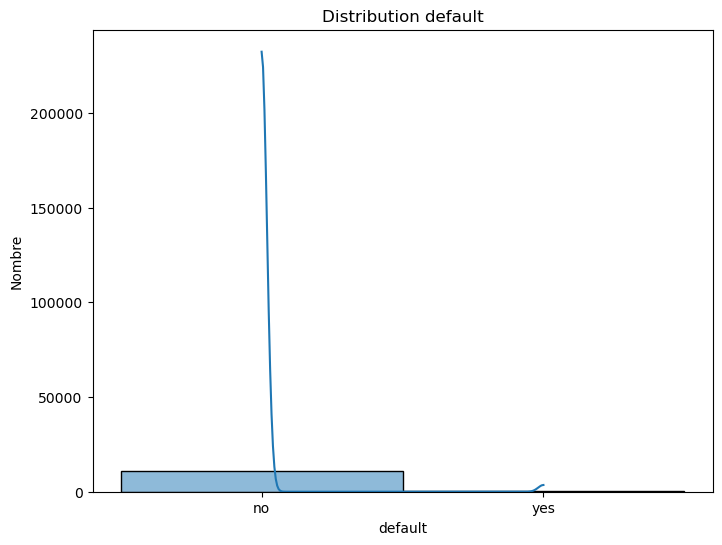

In [120]:
# Histogramme pour la colonne 
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='default', multiple='stack', kde=True)
plt.title("Distribution default")
plt.xlabel("default")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


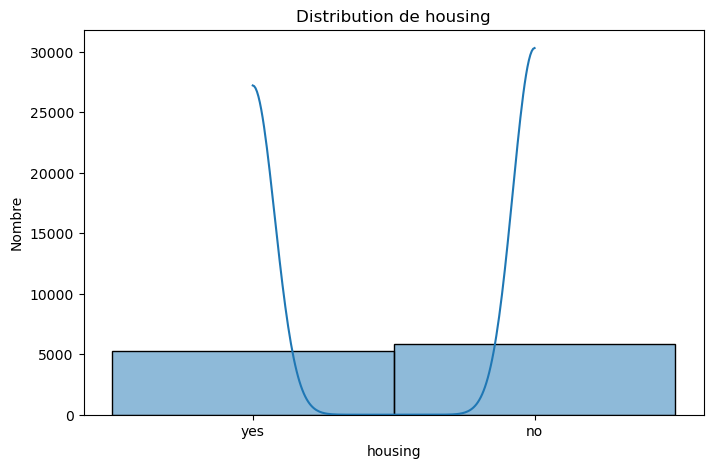

In [121]:
# Histogramme pour la colonne 
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='housing', multiple='stack', kde=True)
plt.title("Distribution de housing")
plt.xlabel("housing")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


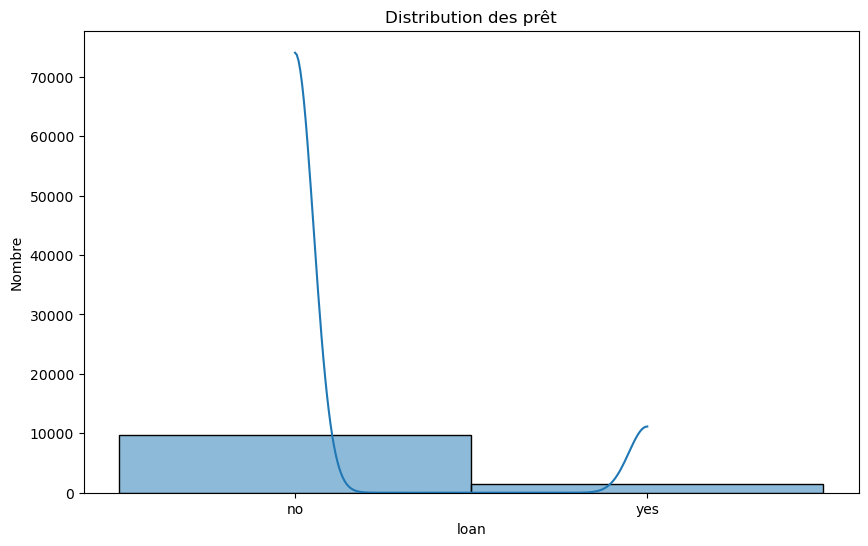

In [122]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan', multiple='stack', kde=True)
plt.title("Distribution des prêt")
plt.xlabel("loan")
plt.ylabel("Nombre")
plt.show()

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


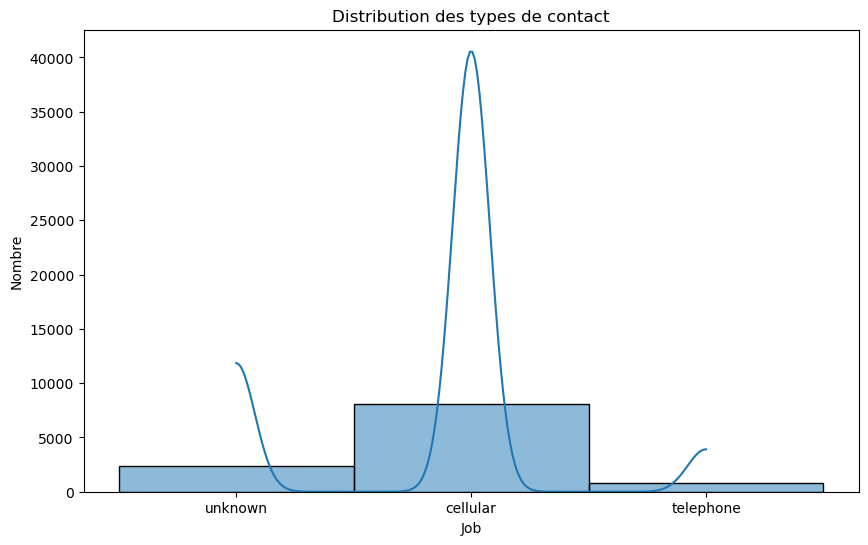

In [123]:
# Histogramme pour la colonne 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='contact', multiple='stack', kde=True)
plt.title("Distribution des types de contact")
plt.xlabel("Job")
plt.ylabel("Nombre")
plt.show()

## Encodages

In [140]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encodage des variables catégorielles
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Séparation des features et du label
X = df.drop('deposit', axis=1).values
y = df['deposit'].values

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [141]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,8,255.0,1.0,-1.0,0.0,3,1
1,56,0,1,1,0,45.0,0,0,2,5,8,255.0,1.0,-1.0,0.0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5,8,255.0,1.0,-1.0,0.0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.0,0.0,3,1
4,54,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.0,0.0,3,1


## Modelisation 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exemple hypothétique de préparation des données
# Assurez-vous d'avoir vos données correctement préparées avant l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

C:\Users\7MAKSACOD PC\anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4942 - loss: 22.2443 - val_accuracy: 0.5997 - val_loss: 5.9140
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5233 - loss: 10.5543 - val_accuracy: 0.5705 - val_loss: 5.9086
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5368 - loss: 8.7404 - val_accuracy: 0.5885 - val_loss: 5.8067
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5471 - loss: 7.7454 - val_accuracy: 0.5801 - val_loss: 5.7071
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5709 - loss: 7.0101 - val_accuracy: 0.5241 - val_loss: 5.6986
Epoch 6/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5586 - loss: 6.6318 - val_accuracy: 0.5190 - val_loss: 5.5432
Epoch 7/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5682 - loss: 6.1007 - val_accuracy: 0.5241 - val_loss: 5.4690
Epoch 8/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5808 - loss: 5.7983 - val_ac

In [131]:
# Affichage de la structure du modèle
model.summary()# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prédictions sur les données de test
predictions = model.predict(X_test)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,429 (2.10 MB)

 Trainable params: 183,809 (718.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 367,620 (1.40 MB)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.5399
Test Loss: 0.5095462203025818
Test Accuracy: 0.7487684488296509
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
